# Lecture 1

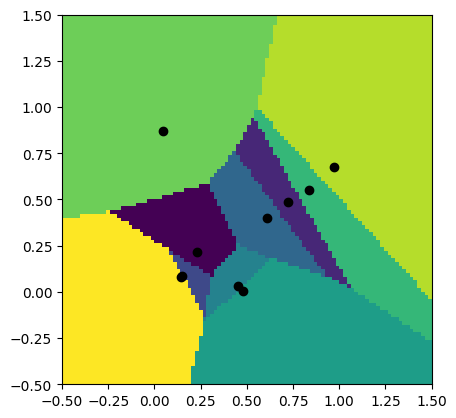

In [13]:
# O(n^2) Voronoi Algorithm diagram for a set of points
import numpy as np
import matplotlib.pyplot as plt
import random

# Create a set of points
points = np.array([[random.random(), random.random()] for i in range(10)])
# Create a grid of points
x = np.linspace(-0.5, 1.5, 100)
y = np.linspace(-0.5, 1.5, 100)
X, Y = np.meshgrid(x, y)
# Create a Voronoi diagram
vor = np.zeros((100, 100))
for i in range(100):
    for j in range(100):
        vor[i, j] = np.argmin(np.sum((points - [X[i, j], Y[i, j]])**2, axis=1))
# Plot the Voronoi diagram
plt.imshow(vor, extent=(-0.5, 1.5, -0.5, 1.5), origin='lower', cmap='viridis')
plt.plot(points[:, 0], points[:, 1], 'ko')
plt.show()


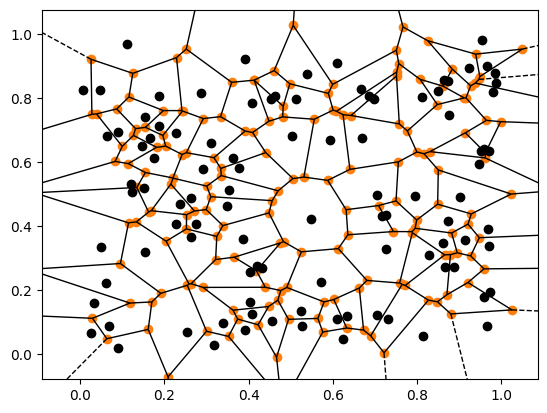

In [14]:
# O(nlogn) Voronoi Algorithm diagram for a set of points using scipy
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.spatial import Voronoi, voronoi_plot_2d

# Create a set of points
points = np.array([[random.random(), random.random()] for _ in range(100)])
# Create a Voronoi diagram
vor = Voronoi(points)
# Plot the Voronoi diagram
voronoi_plot_2d(vor)
plt.plot(points[:, 0], points[:, 1], 'ko')
plt.show()

[((0.5815287183530328, 0.5796930363287494), (0.7929011181048005, 0.7721024225244378)), ((0.7929011181048005, 0.7721024225244378), (0.5085739414288223, 0.5351535470443788)), ((0.5085739414288223, 0.5351535470443788), (0.28259656821800727, 0.2040290580234143)), ((0.28259656821800727, 0.2040290580234143), (0.49786577634120777, 0.2164922788287552)), ((0.49786577634120777, 0.2164922788287552), (0.5815287183530328, 0.5796930363287494))]


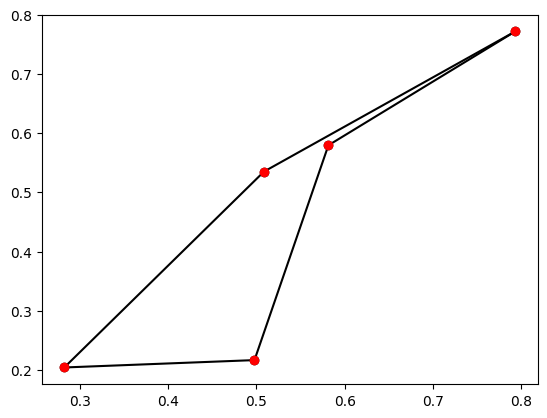

In [33]:
# Python Implementation
class Point:
	def __init__(self, x, y):
		self.x = x
		self.y = y
	def __repr__(self):
		return f'({self.x}, {self.y})'
	
	def __sub__(self, other):
		return Point(self.x - other.x, self.y - other.y)
	
	def __add__(self, other):
		return Point(self.x + other.x, self.y + other.y)
	
class Voronoi:
	def __init__(self, points):
		self.points = points
		self.edges = []
		self.vertices = []
		self.compute()
	
	def compute(self):
		# Create a list of edges counter-clockwise
		for i in range(len(self.points)):
			self.edges.append((self.points[i], self.points[(i+1)%len(self.points)]))
		
		# Create a list of vertices
		for i in range(len(self.points)):
			x1, y1 = self.points[i].x, self.points[i].y
			x2, y2 = self.points[(i+1)%len(self.points)].x, self.points[(i+1)%len(self.points)].y
			x3, y3 = self.points[(i+2)%len(self.points)].x, self.points[(i+2)%len(self.points)].y
			m1 = (y2-y1)/(x2-x1)
			m2 = (y3-y2)/(x3-x2)
			if m1 == m2:
				continue
			b1 = y1 - m1*x1
			b2 = y2 - m2*x2
			x = (b2-b1)/(m1-m2)
			y = m1*x + b1
			self.vertices.append(Point(x, y))

		print(self.edges)

	
	def plot(self):
		# Plot the edges
		for edge in self.edges:
			plt.plot([edge[0].x, edge[1].x], [edge[0].y, edge[1].y], 'k-')
		# Plot the vertices
		for vertex in self.vertices:
			plt.plot(vertex.x, vertex.y, 'ko')
		# Plot the points
		for point in self.points:
			plt.plot(point.x, point.y, 'ro')
		plt.show()

points = [Point(random.random(), random.random()) for _ in range(5)]
vor = Voronoi(points)
vor.plot()

# Lecture 2

y cambia a  9  con  (8, 9)
y cambia a  8  con  (1, 8)
 status cam  [(8, 9), (1, 8), (8, 9)]
y cambia a  6  con  (3, 6)
 status cam  [(1, 8), (3, 6), (1, 8), (8, 9)]
 procesando circle  {'ids': [4, 5, 6], 'coord': (4.375, 9.375), 'y': 5.730655065721687}
status cambia a  [(1, 8), (3, 6), (8, 9)]
y cambia a  5  con  (10, 5)
 status cam  [(1, 8), (3, 6), (8, 9), (10, 5), (8, 9)]
y cambia a  3.2  con  (9, 3.2)
 status cam  [(3, 6), (8, 9), (10, 5), (9, 3.2), (10, 5)]
y cambia a  3  con  (4, 3)
 status cam  [(3, 6), (4, 3), (3, 6), (8, 9), (10, 5), (9, 3.2), (10, 5)]
 procesando circle  {'ids': [4, 6, 3], 'coord': (6.538461538461538, 5.76923076923077), 'y': 2.223252131810429}
status cambia a  [(3, 6), (4, 3), (3, 6), (10, 5), (9, 3.2), (10, 5)]
 procesando circle  {'ids': [4, 3, 2], 'coord': (6.53529411764706, 5.747058823529414), 'y': 2.202727611999625}
status cambia a  [(3, 6), (4, 3), (3, 6), (9, 3.2), (10, 5)]
 procesando circle  {'ids': [1, 4, 2], 'coord': (6.405263157894738, 5.468421052

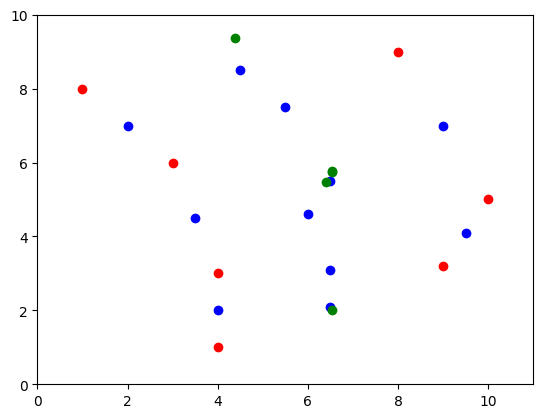

In [34]:
import math


##-------------------
##FUNCIONES AUXILIARES
##busca todas las posibles intersecciones dentro del estado de la beach line y las adiciona a la lista de eventos,
def search_inter():
  global events
  aux_l=status['beach']
  circle_ev=[ev for ev in events if 'y' in ev]

  for i in range(len(aux_l)-2):
    if aux_l[i:i+3] not in [ev['ids'] for ev in circle_ev]:
    #verifica centro de circulos si tres existen 3 arcos consecutivos distintos en el estado
      p1=ind_p[aux_l[i]]
      p2=ind_p[aux_l[i+1]]
      p3=ind_p[aux_l[i+2]]
      if p1[1] != p2[1] and p2[1] != p3[1] and p1[1] != p3[1]:
        ctr,rad=centr_circle(p1,p2,p3)
        if ctr[1]-rad < status['y']:
          insert_ev(aux_l[i],aux_l[i+1],aux_l[i+2],ctr,rad)
    ##si existen busca cual es la interseccion de estos arcos, si el punto inferior del circulo se encuentra bajo la linea de barrido
    ##adiciona un circle event a la linea de eventos
        #si la parte inferior del circulo se encuentra por debajo de la linea de barrido insertarlo en la fila de eventos

#da la coordenada en y para un punto x con la parapola generada desde el punto p
def parabola(x,p,l):
  return (p[0]**2 - l**2 - 2 * p[0] * x + x**2 + p[1]**2) / (2 * (p[1] - l))

#dados los indices de dos puntos adiciona el bisector a los los vertices del diagrama de Voronoi
def add_bisect(i1,i2):
  p1x,p1y=ind_p[i1]
  p2x,p2y=ind_p[i2]
  vor_vertices[(i1,i2)]=((p1x+p2x)/2,(p1y+p2y)/2)

##da el id del arco en el beach line directamente sobre un nuevo punto p
def id_arc_above(pto):
  ind_min=-1
  minn=10000
  l=status['y']
  for p in status['beach']:
    val=parabola(pto[0],ind_p[p],l)
    if val < minn:
      ind_min=p
      minn=val
  return ind_min
#procesa los eventos
#finds the centr of the circle defined by three points, caveat, no two points can have the same y coordinate
def bisector_2p(p1, p2):
    p1x, p1y = p1
    p2x, p2y = p2
    m1 = ((p2x - p1x)/(p1y - p2y) )
    b1 = (p1y + p2y) / 2 - m1 * (p1x + p2x) / 2
    return (m1, b1)

def int_2lines(m1, b1, m2, b2):
    x = (b2 - b1) / (m1 - m2)
    y = m1 * x + b1
    return (x, y)

def centr_circle(p1, p2, p3):
    ##cambiar en esta parte usando las funciones auxiliares para que asigne los valores adecuados al radio y al punto (pt)
    m1, b1 = bisector_2p(p1, p2)
    m2, b2 = bisector_2p(p2, p3)
    pt = int_2lines(m1, b1, m2, b2)
    rad = math.sqrt((pt[0] - p1[0])**2 + (pt[1] - p1[1])**2)
    return pt,rad

#adiciona el circle event manteniendo el orden
#implementar una manera mas eficiente de adicionar en la lista de eventos
def insert_ev(i1,i2,i3,ctr,rad):
  global events
  new_ev={'ids':[i1,i2,i3],'coord':ctr, 'y':ctr[1]-rad}
  if len(events)==0:
     events=[new_ev]
  else:
    y_top=events[-1]['y'] if 'y' in events[-1] else events[-1][1]
    x_top=events[-1]['coord'][0] if 'coord' in events[-1] else events[-1][0]
    if y_top <ctr[1]-rad or (y_top==ctr[1]-rad and x_top>ctr[0]):
        events.append(new_ev)
    else:
        for i in range(len(events)):
            event=events[i]
            event_y = event['y'] if 'y' in event else event[1]
            event_x = event['coord'][0] if 'coord' in event else event[0]
            if event_y>ctr[1]-rad or (event_y==ctr[1]-rad and event_x<ctr[0]):
                events=events[:i] + [new_ev]+ events[i:]



points=[(3, 6), (10, 5), (4, 3), (8, 9), (9, 3.2), (1, 8), (4, 1)]
## En el estado se mantiene el actual orden de los arcos
##
#funcion que da el valor en y  correspondiente a x en la parabola dada por la linea a altura l
# punto p
def elimina_arcos_fuera(y):
   global bd_max_x
   global bd_min_x
   while len(status['beach']) >1 and parabola(bd_min_x ,ind_p[status['beach'][0]],y) > parabola(bd_min_x ,ind_p[status['beach'][1]],y):
      status['beach']=status['beach'][1:]
   while len(status['beach']) >1 and parabola(bd_max_x ,ind_p[status['beach'][-1]],y) > parabola(bd_max_x ,ind_p[status['beach'][-2]],y):
      status['beach']=status['beach'][:-1]

#define los bordes en que esta el diagrama
bd_max_x=max([p[0] for p in points])
bd_min_x=min([p[0] for p in points])
bd_max_y=max([p[1] for p in points])
bd_min_y=min([p[1] for p in points])
#en el estado se guarda en beach el orden de los segmentos de izquierda a derecha
#en el beach line, la actual altura y de la linea de barrido
status={'beach':[]}
#diccionario que como llave tiene los indices de los nodos involucrados y como valor las coordenadas
vor_vertices={}
events=sorted(points, key=lambda x: (x[1],-x[0]))
#shallow copy sirve como diccionario de indice -> punto, indice segun orden como eventos
ind_p=events[:]



while len(events) >0:
  to_process=events.pop()

  #caso en que el evento a procesar sea un nuevo nodo
  if to_process in ind_p:
    status['y']=to_process[1]
    elimina_arcos_fuera(status['y'])
    print('y cambia a ',status['y'],' con ', to_process)
    #indice del arco sobre el nodo
    ind=id_arc_above(to_process)
    i_2proc=ind_p.index(to_process)
    if ind==-1:
      status['beach']=[i_2proc]
    else:
      aux_i=status['beach'].index(ind)
      add_bisect(ind,i_2proc)
      status['beach']=status['beach'][:aux_i +1]+[i_2proc]+status['beach'][aux_i:]
      print(' status cam ',[ind_p[i] for i in status['beach']])
      search_inter()
  #caso en que el evento a procesar sea un circle event
  else:
    status['y']=to_process['y']
    print(' procesando circle ',to_process)
    ids=to_process['ids']
    beach_st=status['beach']
    #elimina el elemento de la mitad en la secuencia especifica
    for i in range(len(beach_st) - 2 ):
        if beach_st[i:i + 3] == ids:
          k=i
          status['beach']=beach_st[:i+1]+beach_st[i+2:]
          print('status cambia a ',[ind_p[i] for i in status['beach']])
          break

    add_bisect(status['beach'][k],status['beach'][k+1])
    search_inter()
    events=[e for e in events if not ('ids' in e and ids[1] in e['ids'])]
    vor_vertices[(ids[0],ids[1],ids[2])]=to_process['coord']

for key in vor_vertices:
  print(key, vor_vertices[key])

# Plotting the voronoi diagram
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlim(bd_min_x-1, bd_max_x+1)
ax.set_ylim(bd_min_y-1, bd_max_y+1)
for vor_p in vor_vertices:
    if len(vor_p)>2:
       ax.plot(vor_vertices[vor_p][0], vor_vertices[vor_p][1], 'go')
    else:
       ax.plot(vor_vertices[vor_p][0], vor_vertices[vor_p][1], 'bo')
for point in points:
    ax.plot(point[0], point[1], 'ro')

plt.show()